In [1]:
import random
import time
import matplotlib.pyplot as plt

In [2]:
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quicksort(arr, low, high):
    stack = [(low, high)]
    while stack:
        l, h = stack.pop()
        if l < h:
            pi = partition(arr, l, h)
            stack.append((l, pi - 1))
            stack.append((pi + 1, h))

# Test the implementation
arr = [10, 7, 8, 9, 1, 5]
print("Original array:", arr)
quicksort(arr, 0, len(arr) - 1)
print("Sorted array:", arr)

Original array: [10, 7, 8, 9, 1, 5]
Sorted array: [1, 5, 7, 8, 9, 10]


In [3]:
def random_partition(arr, low, high):
    rand_pivot = random.randint(low, high)
    arr[rand_pivot], arr[high] = arr[high], arr[rand_pivot]
    return partition(arr, low, high)

def random_quicksort(arr, low, high):
    stack = [(low, high)]
    while stack:
        l, h = stack.pop()
        if l < h:
            pi = random_partition(arr, l, h)
            stack.append((l, pi - 1))
            stack.append((pi + 1, h))

# Test the implementation
arr = [10, 7, 8, 9, 1, 5]
print("Original array:", arr)
random_quicksort(arr, 0, len(arr) - 1)
print("Sorted array:", arr)

Original array: [10, 7, 8, 9, 1, 5]
Sorted array: [1, 5, 7, 8, 9, 10]


In [4]:
def generate_array(size, distribution='random'):
    if distribution == 'random':
        return [random.randint(1, 1000) for _ in range(size)]
    elif distribution == 'sorted':
        return list(range(1, size + 1))
    elif distribution == 'reverse_sorted':
        return list(range(size, 0, -1))

def time_sort_multiple(sort_func, arr, runs=5):
    times = []
    for _ in range(runs):
        arr_copy = arr.copy()
        start_time = time.time()
        sort_func(arr_copy, 0, len(arr_copy) - 1)
        end_time = time.time()
        times.append(end_time - start_time)
    return sum(times) / len(times)

# Sizes to test
sizes = [100, 500, 1000, 5000, 10000]

# Distributions to test
distributions = ['random', 'sorted', 'reverse_sorted']

# Results dictionary
results = {d: {'deterministic': [], 'randomized': []} for d in distributions}

In [6]:
for distribution in distributions:
    for size in sizes:
        # Generate array
        arr = generate_array(size, distribution)
        
        # Time deterministic quicksort
        det_time = time_sort_multiple(quicksort, arr)
        results[distribution]['deterministic'].append(det_time)
        
        # Time randomized quicksort
        rand_time = time_sort_multiple(random_quicksort, arr)
        results[distribution]['randomized'].append(rand_time)
        
        print(f"Completed: {distribution}, size {size}")

Completed: random, size 100
Completed: random, size 500
Completed: random, size 1000
Completed: random, size 5000
Completed: random, size 10000
Completed: sorted, size 100
Completed: sorted, size 500
Completed: sorted, size 1000
Completed: sorted, size 5000
Completed: sorted, size 10000
Completed: reverse_sorted, size 100
Completed: reverse_sorted, size 500
Completed: reverse_sorted, size 1000
Completed: reverse_sorted, size 5000
Completed: reverse_sorted, size 10000


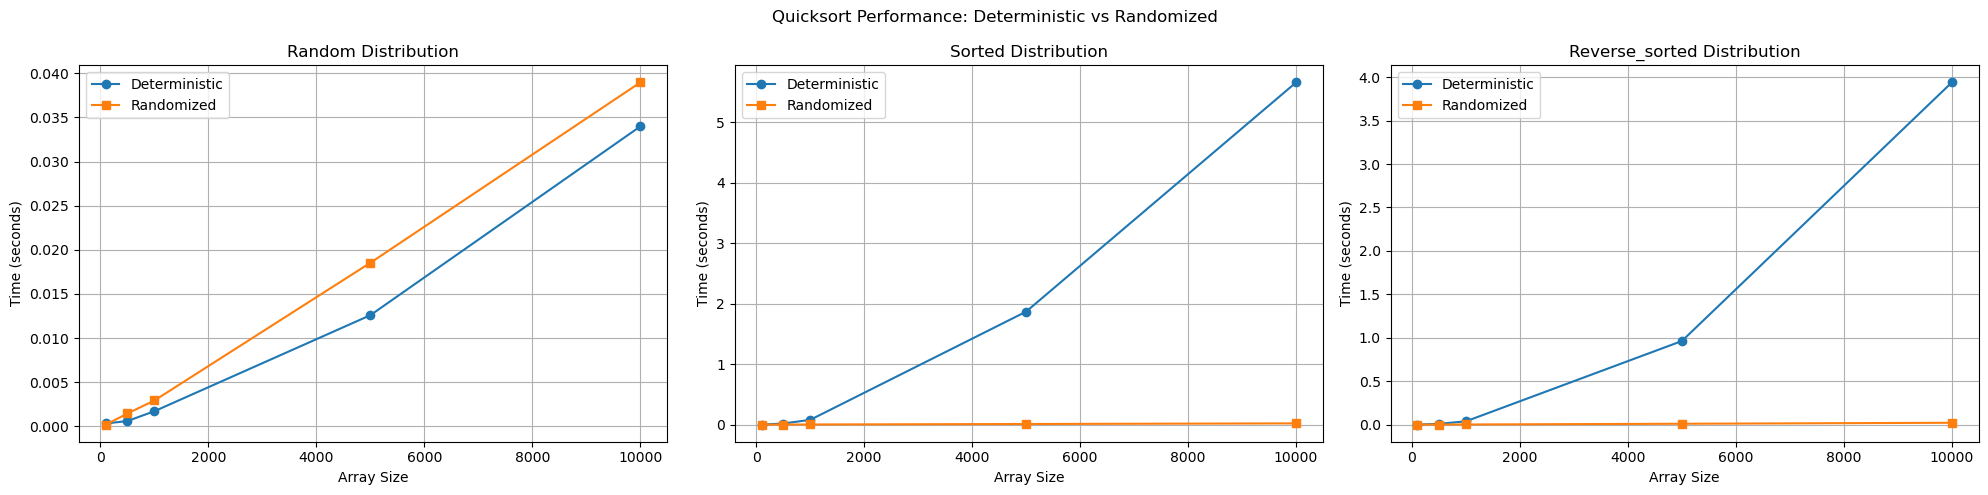

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Quicksort Performance: Deterministic vs Randomized')

for i, (distribution, data) in enumerate(results.items()):
    axs[i].plot(sizes, data['deterministic'], label='Deterministic', marker='o')
    axs[i].plot(sizes, data['randomized'], label='Randomized', marker='s')
    axs[i].set_title(f'{distribution.capitalize()} Distribution')
    axs[i].set_xlabel('Array Size')
    axs[i].set_ylabel('Time (seconds)')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [8]:
print("Detailed Results:")
for distribution in distributions:
    print(f"\n{distribution.capitalize()} Distribution:")
    print("Size\tDeterministic\tRandomized")
    for i, size in enumerate(sizes):
        det_time = results[distribution]['deterministic'][i]
        rand_time = results[distribution]['randomized'][i]
        print(f"{size}\t{det_time:.6f}\t\t{rand_time:.6f}")

Detailed Results:

Random Distribution:
Size	Deterministic	Randomized
100	0.000329		0.000202
500	0.000610		0.001463
1000	0.001723		0.002937
5000	0.012599		0.018536
10000	0.033987		0.038969

Sorted Distribution:
Size	Deterministic	Randomized
100	0.000800		0.000219
500	0.018398		0.001207
1000	0.079018		0.002604
5000	1.870094		0.010241
10000	5.662492		0.020889

Reverse_sorted Distribution:
Size	Deterministic	Randomized
100	0.000400		0.000000
500	0.008969		0.000800
1000	0.038096		0.001600
5000	0.962229		0.009865
10000	3.938867		0.021203


In [9]:
def analyze_results(results):
    for distribution in distributions:
        det_times = results[distribution]['deterministic']
        rand_times = results[distribution]['randomized']
        
        print(f"\nAnalysis for {distribution.capitalize()} Distribution:")
        
        # Compare average performance
        det_avg = sum(det_times) / len(det_times)
        rand_avg = sum(rand_times) / len(rand_times)
        print(f"Average time - Deterministic: {det_avg:.6f}, Randomized: {rand_avg:.6f}")
        
        # Compare worst-case performance
        det_worst = max(det_times)
        rand_worst = max(rand_times)
        print(f"Worst-case time - Deterministic: {det_worst:.6f}, Randomized: {rand_worst:.6f}")
        
        # Calculate speedup
        if rand_avg != 0:
            speedup = det_avg / rand_avg
            print(f"Average speedup of randomized version: {speedup:.2f}x")
        else:
            print("Average speedup of randomized version: N/A (division by zero)")
        
        # Analyze scalability
        if det_times[0] != 0 and rand_times[0] != 0:
            det_ratio = det_times[-1] / det_times[0]
            rand_ratio = rand_times[-1] / rand_times[0]
            print(f"Scalability (ratio of largest to smallest input) - Deterministic: {det_ratio:.2f}, Randomized: {rand_ratio:.2f}")
        else:
            print("Scalability: Unable to calculate (division by zero)")

# Run the analysis
analyze_results(results)


Analysis for Random Distribution:
Average time - Deterministic: 0.009850, Randomized: 0.012421
Worst-case time - Deterministic: 0.033987, Randomized: 0.038969
Average speedup of randomized version: 0.79x
Scalability (ratio of largest to smallest input) - Deterministic: 103.21, Randomized: 193.38

Analysis for Sorted Distribution:
Average time - Deterministic: 1.526160, Randomized: 0.007032
Worst-case time - Deterministic: 5.662492, Randomized: 0.020889
Average speedup of randomized version: 217.03x
Scalability (ratio of largest to smallest input) - Deterministic: 7078.63, Randomized: 95.19

Analysis for Reverse_sorted Distribution:
Average time - Deterministic: 0.989712, Randomized: 0.006694
Worst-case time - Deterministic: 3.938867, Randomized: 0.021203
Average speedup of randomized version: 147.86x
Scalability: Unable to calculate (division by zero)
